<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!which python3

/usr/bin/python3


In [2]:
!pip install torchtext==0.2.3

     |████████████████████████████████| 51kB 2.7MB/s 
  Created wheel for torchtext: filename=torchtext-0.2.3-cp36-none-any.whl size=40134 sha256=54bafe26e495313f080d6552013ee2e87178b7ab0b53100bbf9e2accb168d926
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [3]:
!pip install torchvision==0.2.2

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Found existing installation: torchvision 0.4.1+cu100
    Uninstalling torchvision-0.4.1+cu100:
      Successfully uninstalled torchvision-0.4.1+cu100


In [0]:
import torchvision

In [4]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 5.1MB/s 
     |████████████████████████████████| 496.4MB 29kB/s 
     |████████████████████████████████| 1.5MB 47.1MB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2664393 sha256=ba50429b159419439ec5ec0352ba120d9b0632b1e0242301c14d7e4f69665ff4
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
  Found existing installation: torch 1.3.0+cu100
    Uninstalling torch-1.3.0+cu100:
      Successfully uninstalled torch-1.3.0+cu100
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [24]:
!pip install torch==1.3.1

     |████████████████████████████████| 734.6MB 23kB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1


In [0]:
import torch.nn as nn

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [0]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

In [0]:
PATH = "/content/gdrive/My Drive/Fastai/"

In [0]:
import os
os.makedirs(PATH, exist_ok = True)

In [0]:
URL = "http://deeplearning.net/data/mnist/"
FILENAME = 'mnist.pkl.gz'
def load_mnist(filename):
  return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [7]:
%ls /content/gdrive/My\ Drive/

Fastai/


In [8]:
get_data(URL+FILENAME, PATH+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(PATH + FILENAME)

mnist.pkl.gz: 16.2MB [00:02, 6.82MB/s]                            


In [9]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [10]:
mean = x.mean()
std = x.std()

x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [0]:
def show(img, title=None):
  plt.imshow(img, cmap="gray")
  if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
  f = plt.figure(figsize=figsize)
  cols = len(ims)//rows
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i], cmap='gray')

In [13]:
x_valid.shape

(10000, 784)

In [14]:
x_imgs = np.reshape(x_valid, (-1, 28, 28)); x_imgs.shape

(10000, 28, 28)

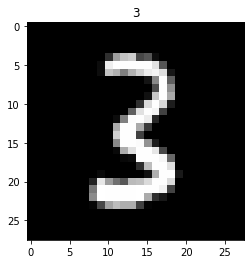

In [15]:
show(x_imgs[0], y_valid[0])

In [16]:
y_valid.shape

(10000,)

In [17]:
y_valid[0]

3

In [18]:
x_imgs[0, 10:20, 10:20]

array([[0.     , 0.     , 0.     , 0.     , 0.18359, 0.85156, 0.99219, 0.84375, 0.11328, 0.     ],
       [0.     , 0.     , 0.     , 0.37109, 0.87891, 0.99219, 0.95703, 0.25391, 0.     , 0.     ],
       [0.     , 0.04688, 0.5    , 0.98438, 0.99219, 0.92188, 0.15625, 0.     , 0.     , 0.     ],
       [0.     , 0.67188, 0.99219, 0.99219, 0.66406, 0.22656, 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.80859, 0.99219, 0.99219, 0.25391, 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.53516, 0.99219, 0.99219, 0.98047, 0.57031, 0.10156, 0.     , 0.     , 0.     ],
       [0.     , 0.03516, 0.67578, 0.875  , 0.99219, 0.99219, 0.89844, 0.27734, 0.     , 0.     ],
       [0.     , 0.     , 0.03125, 0.04688, 0.99219, 0.99219, 0.99219, 0.96094, 0.40625, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.17969, 0.73828, 0.99219, 0.99219, 0.875  , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.06641, 0.68359, 0.99219, 0.99219, 0.09766]],
      dty

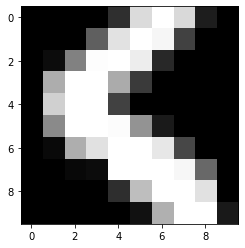

In [25]:
show(x_imgs[0, 10:20, 10:20])

In [0]:
#:8 means 到8 #### 8:means 从8开始

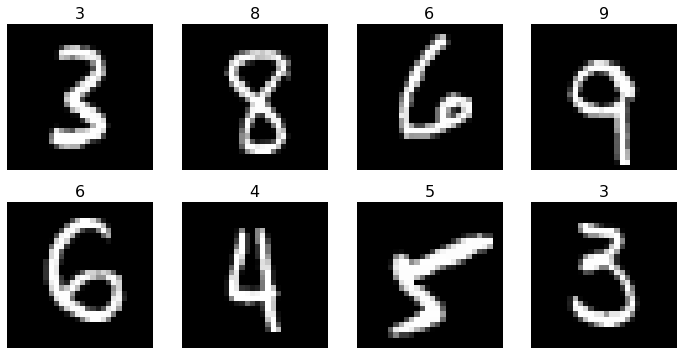

In [26]:
plots(x_imgs[:8], titles=y_valid[:8])

In [0]:

net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

In [0]:
md = ImageClassifierData.from_arrays(PATH, (x,y), (x_valid, y_valid))

In [0]:

loss=nn.NLLLoss()
metrics=[]
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [64]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   
    0      0.248774   0.552487  
    1      0.215327   0.753747  
    2      0.223459   0.62881   
    3      0.210748   0.648794  
    4      0.197776   0.667404  



[0.6674042699813842]

In [0]:
set_lrs(opt, 1e-2)

In [23]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   
    0      0.185506   0.850078  
    1      0.128099   0.763724  
    2      0.089429   0.705102  



[0.7051019660949707]

In [78]:
t = [o.numel() for o in net.parameters()]
t, sum(t)

([78400, 100, 10000, 100, 1000, 10], 89610)

In [24]:
torch.cuda.is_available()

True

In [18]:
!ls /usr/local/lib/python3.6/dist-packages

absl
absl_py-0.8.1.dist-info
alabaster
alabaster-0.7.12.dist-info
albumentations
albumentations-0.1.12.dist-info
altair
altair-3.2.0.dist-info
apiclient
astor
astor-0.8.0.dist-info
astropy
astropy-3.0.5.dist-info
atari_py
atari_py-0.2.6.dist-info
atomicwrites
atomicwrites-1.3.0.dist-info
attr
attrs-19.3.0.dist-info
audioread
audioread-2.1.8.dist-info
autograd
autograd-1.3.dist-info
babel
Babel-2.7.0.dist-info
backcall
backcall-0.1.0.dist-info
backports
backports.tempfile-1.0.dist-info
backports.weakref-1.0.post1.dist-info
bcolz
bcolz-1.2.1.dist-info
beautifulsoup4-4.6.3.dist-info
bin
bleach
bleach-3.1.0.dist-info
blis
blis-0.2.4.dist-info
bokeh
bokeh-1.0.4.dist-info
boto
boto-2.49.0.dist-info
boto3
boto3-1.10.7.dist-info
botocore
botocore-1.13.7.dist-info
bottleneck
Bottleneck-1.2.1.dist-info
branca
branca-0.3.1.dist-info
bs4
bs4-0.0.1.dist-info
bson
bz2file-0.98.dist-info
bz2file.py
cachetools
cachetools-3.1.1.dist-info
certifi
certifi-2019.9.11.dist-info
cffi
cffi-1.13.1.dist-info
_c

0.3.1


In [0]:
dl = iter(md.trn_dl)

In [85]:
ymb

tensor([3, 8, 6, 9, 6, 4, 5, 3, 8, 4, 5, 2, 3, 8, 4, 8, 1, 5, 0, 5, 9, 7, 4, 1,
        0, 3, 0, 6, 2, 9, 9, 4, 1, 3, 6, 8, 0, 7, 7, 6, 8, 9, 0, 3, 8, 3, 7, 7,
        8, 4, 4, 1, 2, 9, 8, 1, 1, 0, 6, 6, 5, 0, 1, 1], device='cuda:0')

In [0]:
vxmb = Variable(xmb.cuda())

In [91]:
vxmb

RuntimeError: ignored

In [0]:
preds = predict(net, md.val_ds)

In [27]:
preds

array([-4.46255, -3.1195 , -2.16499, ..., -3.19441, -0.7758 , -2.29745], dtype=float32)